In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler

from keras.callbacks import EarlyStopping

import sklearn
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('45 channel 1sec alphapower with labels.csv')


print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (8391, 46)


,0.99694,1.2771,1.29,0.16234,0.21899,0.63294,1.8593,2.4524,0.18744,0.59947,...,0.0033433,3.0989,1.9315,0.029908,0.94401,0.31607,0.021917,0.28851,1.4024,1
0,1.1828,1.9242,2.8995,1.1328,1.1381,0.8316,1.4732,2.1772,1.2965,0.8767,...,0.0288,0.7712,1.8169,0.0227,0.9729,0.1136,0.0120,0.2226,1.5662,1
1,0.4590,0.6398,0.5279,0.4330,0.3289,0.3059,0.3903,0.6460,0.3342,0.3659,...,0.0040,1.5338,1.1425,0.0715,1.1773,0.1614,0.0286,0.7094,1.5953,1
2,0.2514,0.1832,0.3263,0.7101,0.8187,0.9366,0.7477,1.0315,0.9627,1.0368,...,0.0115,1.5250,1.9702,0.0283,1.4815,0.1929,0.0263,0.3866,1.1761,1
3,1.8005,1.0644,1.3403,0.3815,0.3406,0.3428,0.6530,0.9447,0.3637,0.3651,...,0.0050,0.6423,1.3997,0.0174,0.9630,0.1454,0.0476,0.5132,1.8160,1
4,0.9944,0.3665,0.4925,0.5049,0.5882,0.6795,1.5906,1.8862,0.3102,0.6937,...,0.0214,1.4546,2.2594,0.0339,1.0201,0.2651,0.0132,0.5288,0.9520,1




**Labelling COLUMNS**

In [3]:
print(df.columns)

Index(['0.99694', '1.2771', '1.29', '0.16234', '0.21899', '0.63294', '1.8593',
       '2.4524', '0.18744', '0.59947', '0.76399', '2.4999', '0.20165',
       '0.64587', '2.4696', '0.30758', '0.0086502', '0.75937', '0.80735',
       '0.44883', '0.2202', '0.048213', '0.56816', '2.22', '0.13759',
       '0.22783', '2.3247', '3.8245', '0.16294', '0.45981', '0.63093',
       '2.5048', '0.22467', '0.6429', '2.6522', '1.4054', '0.0033433',
       '3.0989', '1.9315', '0.029908', '0.94401', '0.31607', '0.021917',
       '0.28851', '1.4024', '1'],
      dtype='object')


In [4]:
new_names = {'0.99694':'a', '1.2771':'b', '1.29':'c', '0.16234':'cd', '0.21899':'d','0.63294':'de','1.8593':'e','2.4524':'f','0.18744':'g',
       '0.59947':'l', '0.76399':'m', '2.4999':'n', '0.20165':'o', '0.64587':'p', '2.4696':'q', '0.30758':'r',
       '0.0086502':'s', '0.75937':'t', '0.80735':'u', '0.44883':'v', '0.2202':'w', '0.048213':'x', '0.56816':'y',
       '2.22':'z', '0.13759':'aa', '0.22783':'bb', '2.3247':'cc', '3.8245':'dd', '0.16294':'ee',
       '0.45981':'ff', '0.63093':'gg', '2.5048':'hh', '0.22467':'ii', '0.6429':'jj', '2.6522':'kk',
       '1.4054':'ll', '0.0033433':'mm', '3.0989':'nn', '1.9315':'oo', '0.029908':'pp', '0.94401':'qq',
       '0.31607':'rr','0.021917':'j',
       '0.28851':'k','1.4024':'h','1':'labels'}
df= df.rename(index=str, columns=new_names)

***Checking any null Values***

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8391 entries, 0 to 8390
Data columns (total 46 columns):
a         8391 non-null float64
b         8391 non-null float64
c         8391 non-null float64
cd        8391 non-null float64
d         8391 non-null float64
de        8391 non-null float64
e         8391 non-null float64
f         8391 non-null float64
g         8391 non-null float64
l         8391 non-null float64
m         8391 non-null float64
n         8391 non-null float64
o         8391 non-null float64
p         8391 non-null float64
q         8391 non-null float64
r         8391 non-null float64
s         8391 non-null float64
t         8391 non-null float64
u         8391 non-null float64
v         8391 non-null float64
w         8391 non-null float64
x         8391 non-null float64
y         8391 non-null float64
z         8391 non-null float64
aa        8391 non-null float64
bb        8391 non-null float64
cc        8391 non-null float64
dd        8391 non-null float64
ee

In [6]:
pd.set_option('display.max_columns', None)
print(df.describe())



              a         b         c        cd         d        de         e  \
count 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000   
mean     4.6802    4.2667    4.3584    9.9965    6.2958    6.8694    6.5452   
std      6.8237    6.2223    5.6587   13.9601    9.5182   10.7468   10.6807   
min      0.0830    0.1225    0.0887    0.0486    0.0526    0.0711    0.1718   
25%      1.3498    1.2386    1.5131    2.6776    1.6409    1.5808    1.9797   
50%      2.5578    2.2660    2.7031    5.6476    3.4233    3.4178    3.7687   
75%      5.2588    4.5851    5.0873   11.6425    7.1550    7.5054    7.4836   
max    113.9300   78.9150  148.4300  213.7000  197.3300  163.5600  580.6000   

              f         g         l         m         n         o         p  \
count 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000   
mean     8.3027    8.4731    5.6477    5.2778    8.5688    6.3714    2.9178   
std      9.9361   12.6779    8.4537    7.8964   13.

***spliting the file in the data and target class***

In [8]:
data = df.iloc[:,:-1].values.tolist()
target = df.iloc[:,-1].tolist()

In [9]:

print(data)
print(target)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**heatmap**

Text(0.5, 1.0, 'Correlation of Variables')

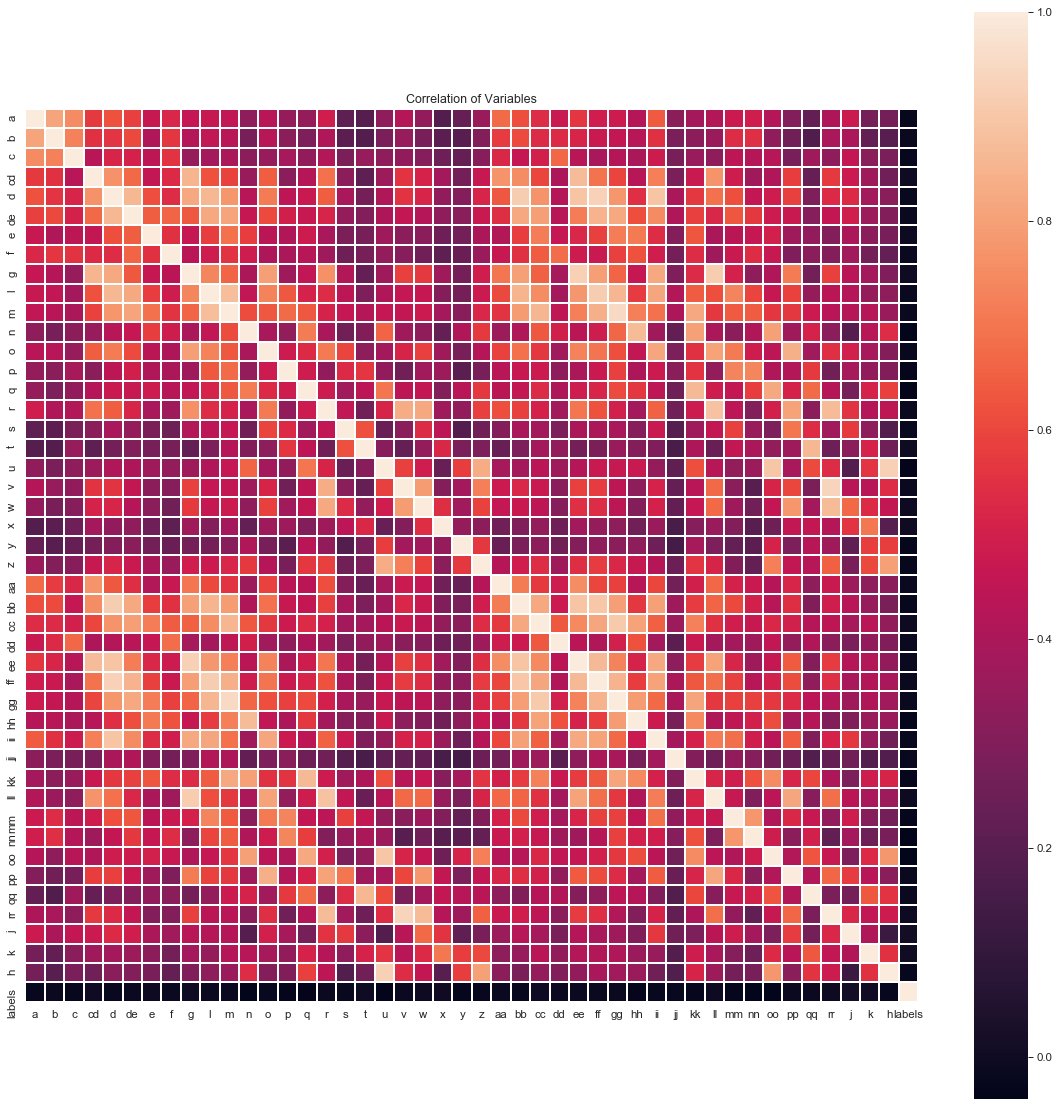

In [10]:
col_list = df.columns
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df[col_list].corr(),square=True,linewidths=1)
plt.title('Correlation of Variables')

**Normalizing**

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x =df[df.columns[:46]]
y =df.labels
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)

 **Select numerical columns which needs to be normalized**

In [12]:
train_norm = x_train[x_train.columns[0:20]]
test_norm = x_test[x_test.columns[0:20]]

**Normalize Training Data**

In [13]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

**Converting numpy array to dataframe**

In [14]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

           a       b       c      cd       d      de       e       f       g  \
1585 -0.5748 -0.4787 -0.2599 -0.6289 -0.1540 -0.2974 -0.6624 -0.7507 -0.3166   
992   1.0258  3.2366  1.4176  1.7573  0.6760  3.8685  0.6962  3.2112 -0.3730   
8204 -0.5763 -0.3979 -0.1967  0.1379 -0.1350  0.2426  0.1671  0.2782  0.2150   
4674 -0.3730 -0.5120 -0.4240 -0.4127 -0.3273 -0.3116 -0.3285 -0.6362 -0.6031   
3593 -0.3469 -0.2392 -0.3240  0.0138 -0.3437 -0.0071  0.6145 -0.0532 -0.2828   

           l       m       n       o       p       q       r       s       t  \
1585  0.2628 -0.5139 -0.5725 -0.1788 -0.2283 -0.3700 -0.5307 -0.3675 -0.0486   
992   0.5697 -0.1601 -0.4528  1.2586 -0.0327 -0.3804  0.0999 -0.1287  0.3253   
8204  0.2954  0.4892 -0.0405 -0.0840  0.3897  1.5561  1.7825  0.1658  0.8437   
4674 -0.4356 -0.2168 -0.2775 -0.1420 -0.4426  0.3868 -0.4609  0.7285  0.0737   
3593 -0.4140  0.2806  0.0433 -0.3328 -0.1253  0.3186 -0.3405 -0.2425 -0.1423   

           u       v      w      x    

**Normalize Testing Data by using mean and SD of training set**

In [15]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

           a       b       c      cd       d      de       e       f       g  \
1585 -0.5748 -0.4787 -0.2599 -0.6289 -0.1540 -0.2974 -0.6624 -0.7507 -0.3166   
992   1.0258  3.2366  1.4176  1.7573  0.6760  3.8685  0.6962  3.2112 -0.3730   
8204 -0.5763 -0.3979 -0.1967  0.1379 -0.1350  0.2426  0.1671  0.2782  0.2150   
4674 -0.3730 -0.5120 -0.4240 -0.4127 -0.3273 -0.3116 -0.3285 -0.6362 -0.6031   
3593 -0.3469 -0.2392 -0.3240  0.0138 -0.3437 -0.0071  0.6145 -0.0532 -0.2828   

           l       m       n       o       p       q       r       s       t  \
1585  0.2628 -0.5139 -0.5725 -0.1788 -0.2283 -0.3700 -0.5307 -0.3675 -0.0486   
992   0.5697 -0.1601 -0.4528  1.2586 -0.0327 -0.3804  0.0999 -0.1287  0.3253   
8204  0.2954  0.4892 -0.0405 -0.0840  0.3897  1.5561  1.7825  0.1658  0.8437   
4674 -0.4356 -0.2168 -0.2775 -0.1420 -0.4426  0.3868 -0.4609  0.7285  0.0737   
3593 -0.4140  0.2806  0.0433 -0.3328 -0.1253  0.3186 -0.3405 -0.2425 -0.1423   

           u       v      w      x    

**Support vector machine**

In [16]:
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
def svm_classifier(): 
    file_x = '45 channel 1sec alphapower.csv'
    file_y = 'Label.csv'
    
    X = data
    y = target
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
   
    	

     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    X_test = sc.transform(X_test)

    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 50)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score : ")
    print(accuracy_score(y_test, y_predict)*100)
    
if __name__ == '__main__':
    svm_classifier()

[[2816  103]
 [2023   93]]
Accuracy score : 
57.77557100297914


**sequential model**

In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
   



model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=25,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/25


InternalError: GPU sync failed

**LSTM MODELLING**

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=2, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

Epoch 1/10


InternalError: GPU sync failed